# This markdown was created by Alvin Chan, to demonstrate the effectiveness for SARSA agent vs q-learning agent.

In [2]:
import gymnasium as gym
import numpy as np
import itertools # 
import sys

import pandas as pd # for plotting statics of result

# for importing env in lib folder below
if "../" not in sys.path:
  sys.path.append("../") 

from lib.envs.cliff_walking import CliffWalkingEnv

/Users/shufaichan/anaconda3/envs/RL_with_gymnasium/lib/python3.12/site-packages/gymnasium/envs/registration.py:498: UserWarning: WARN: Overriding environment GymV26Environment-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [7]:
env = CliffWalkingEnv()

# reminder:

# UP = 0
# RIGHT = 1
# DOWN = 2
# LEFT = 3

print(env.reset())
env.render()

print(env.step(0))
env.render()

print(env.step(1))
env.render()


36
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

(24, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

(25, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T



# solve Cliff with SARSA:

In [8]:
from SARSA import sarsa
from SARSA import make_epsilon_greedy_policy


In [19]:
Q_from_sarsa, stats = sarsa(env, 500)

Episode 500/500.

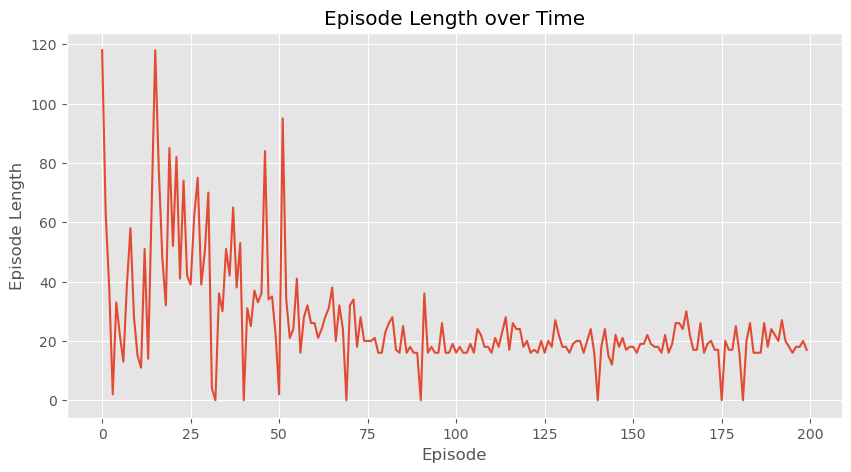

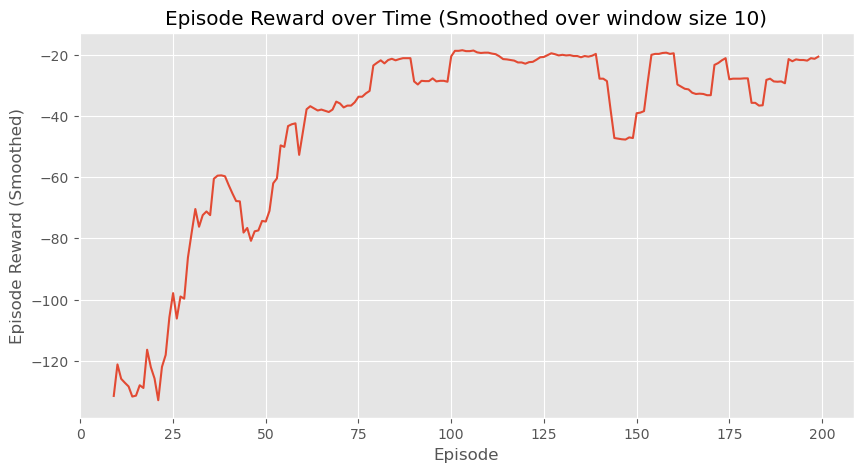

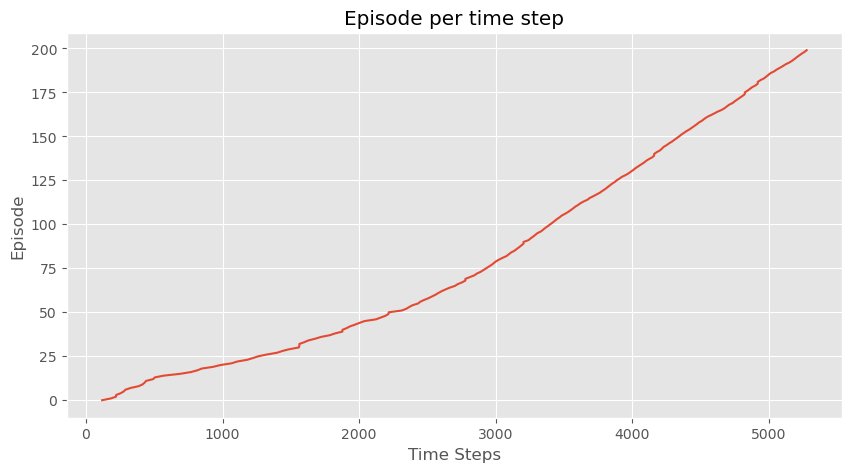

(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>)

In [11]:
from lib import plotting

plotting.plot_episode_stats(stats)

# solve using Q-learning:

In [12]:
from Q_learning import q_learning

In [20]:
Q_q_learning_agent, stats_from_q_learning = q_learning(env, 500)

Episode 500/500.

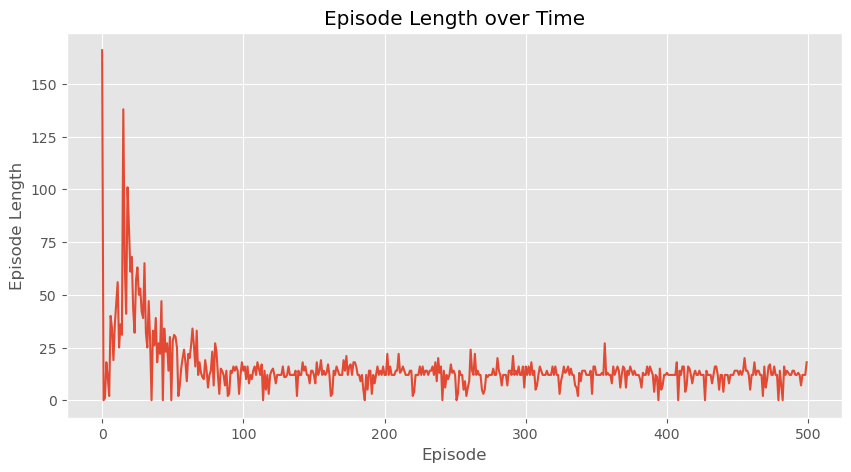

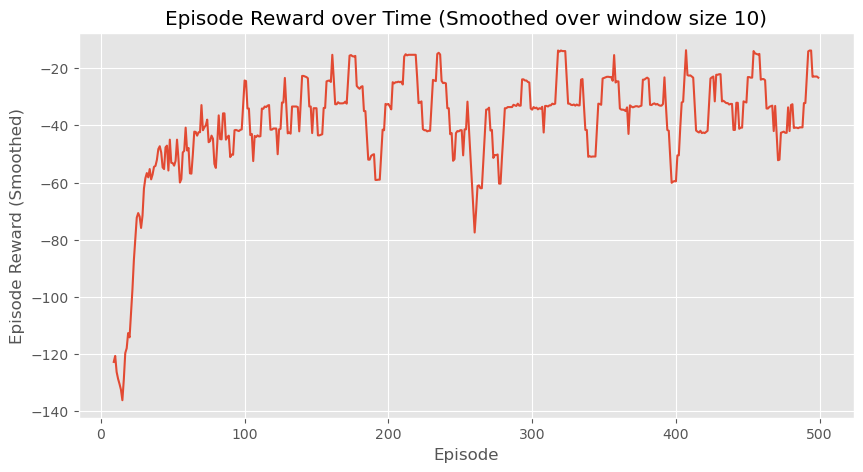

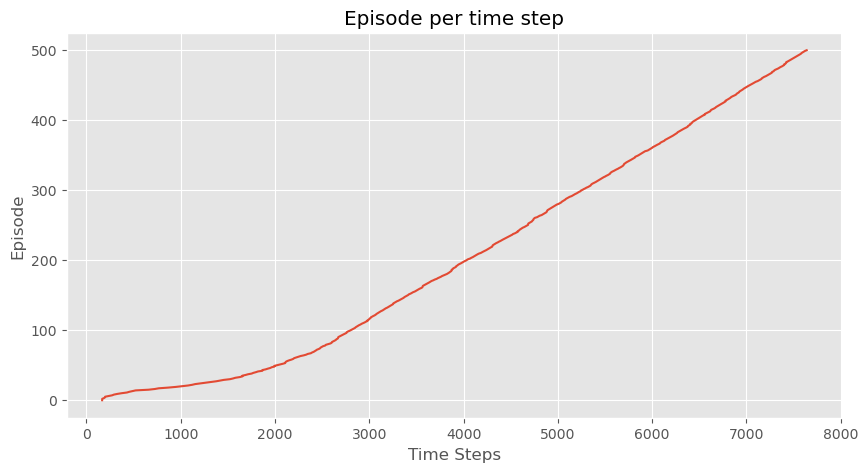

(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>)

In [15]:
plotting.plot_episode_stats(stats_from_q_learning)

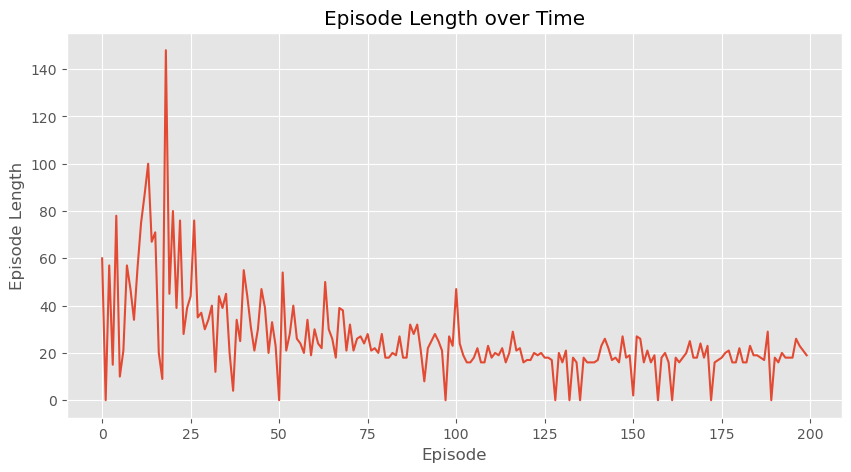

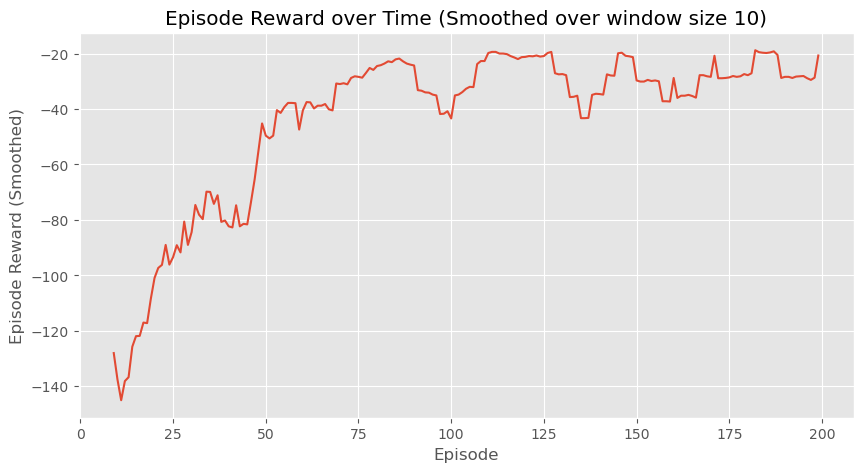

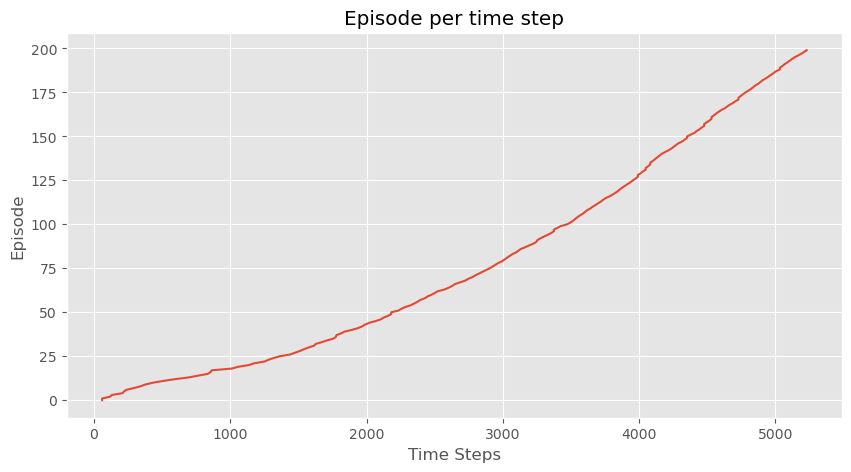

(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>)

In [17]:
plotting.plot_episode_stats(stats)

In [23]:
env.action_space.n

4

# visualize final policy of sarsa agent

In [21]:
def always_act_best( Q, nA):
    """
    give a Q function, return a state to action that always acts by maximizing.
    Assumption required:
    for every state, Q[state] is of length nA  
    
    """

    def policy_fn(observation):
        best_action = np.argmax(Q[observation])
        return best_action
    return policy_fn

In [24]:
sarsa_agent_best_policy = always_act_best(Q_from_sarsa, env.action_space.n )
q_learning_agent_best_policy = always_act_best(Q_q_learning_agent, env.action_space.n)

# how sarsa walk:



In [26]:
state = env.reset()
env.render()

cum_reward = 0
# acting until the end of one episode:
while True:
    action =sarsa_agent_best_policy(state)
    next_state, reward, done, _ = env.step(action)
    cum_reward += reward
    state = next_state
    env.render()
    if done:
        print('The end of episode. Total reward is', cum_reward)
        break

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  x  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  x  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  x  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  x

# how q agent performs:

In [27]:

state = env.reset()
env.render()
cum_reward = 0
# acting until the end of one episode:
while True:
    action = q_learning_agent_best_policy(state)
    next_state, reward, done, _ = env.step(action)
    cum_reward += reward
    state = next_state
    env.render()
    if done:
        print('The end of episode. Total reward is', cum_reward)
        break

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  x  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o